In [33]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [34]:
# INPUT_PATH = 'datasets/totoro_blackplate_singlecam/%03d%03d.png'
INPUT_PATH = 'datasets/green_in_glass_singlecam/%03d%03d.png'

In [35]:
TOTAL_IMAGE_PER_CAMERA = 40
THESHOLD_RATIO = 0.10

In [36]:
def get_diff_mask(camerea_id,current_shot):
    previous_shot = (current_shot - 1) % TOTAL_IMAGE_PER_CAMERA
    # read image
    image_prev_uint = cv2.imread(INPUT_PATH % (camerea_id,previous_shot)) 
    image_current_uint = cv2.imread(INPUT_PATH % (camerea_id,current_shot)) 
    # convert to RGB
    image_prev_uint = cv2.cvtColor(image_prev_uint,cv2.COLOR_BGR2RGB)
    image_current_uint = cv2.cvtColor(image_current_uint,cv2.COLOR_BGR2RGB)
    # rotate
    image_prev_uint = cv2.rotate(image_prev_uint, cv2.ROTATE_90_CLOCKWISE)
    image_current_uint = cv2.rotate(image_current_uint, cv2.ROTATE_90_CLOCKWISE)
    # convert to [0-1]
    image_prev =  image_prev_uint / 255.0
    image_current = image_current_uint / 255.0
    # difference mask between 2 images
    diff_mask = np.linalg.norm(image_current - image_prev, axis=-1)
    diff_mask = (diff_mask > THESHOLD_RATIO) * 1.0
    #remove noise from sensor (hope this not ruin image)
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
    denoised_mask = cv2.morphologyEx(diff_mask, cv2.MORPH_OPEN, kernel)
    return denoised_mask

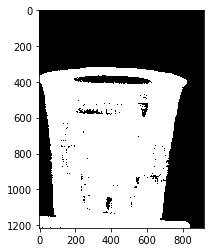

In [37]:
CAMERA_NUMBER = 0
foreground_prob = get_diff_mask(CAMERA_NUMBER,0)
for i in range(1,40):
    foreground_prob = cv2.bitwise_or(foreground_prob,get_diff_mask(CAMERA_NUMBER,i))
plt.imshow(foreground_prob,cmap='gray')

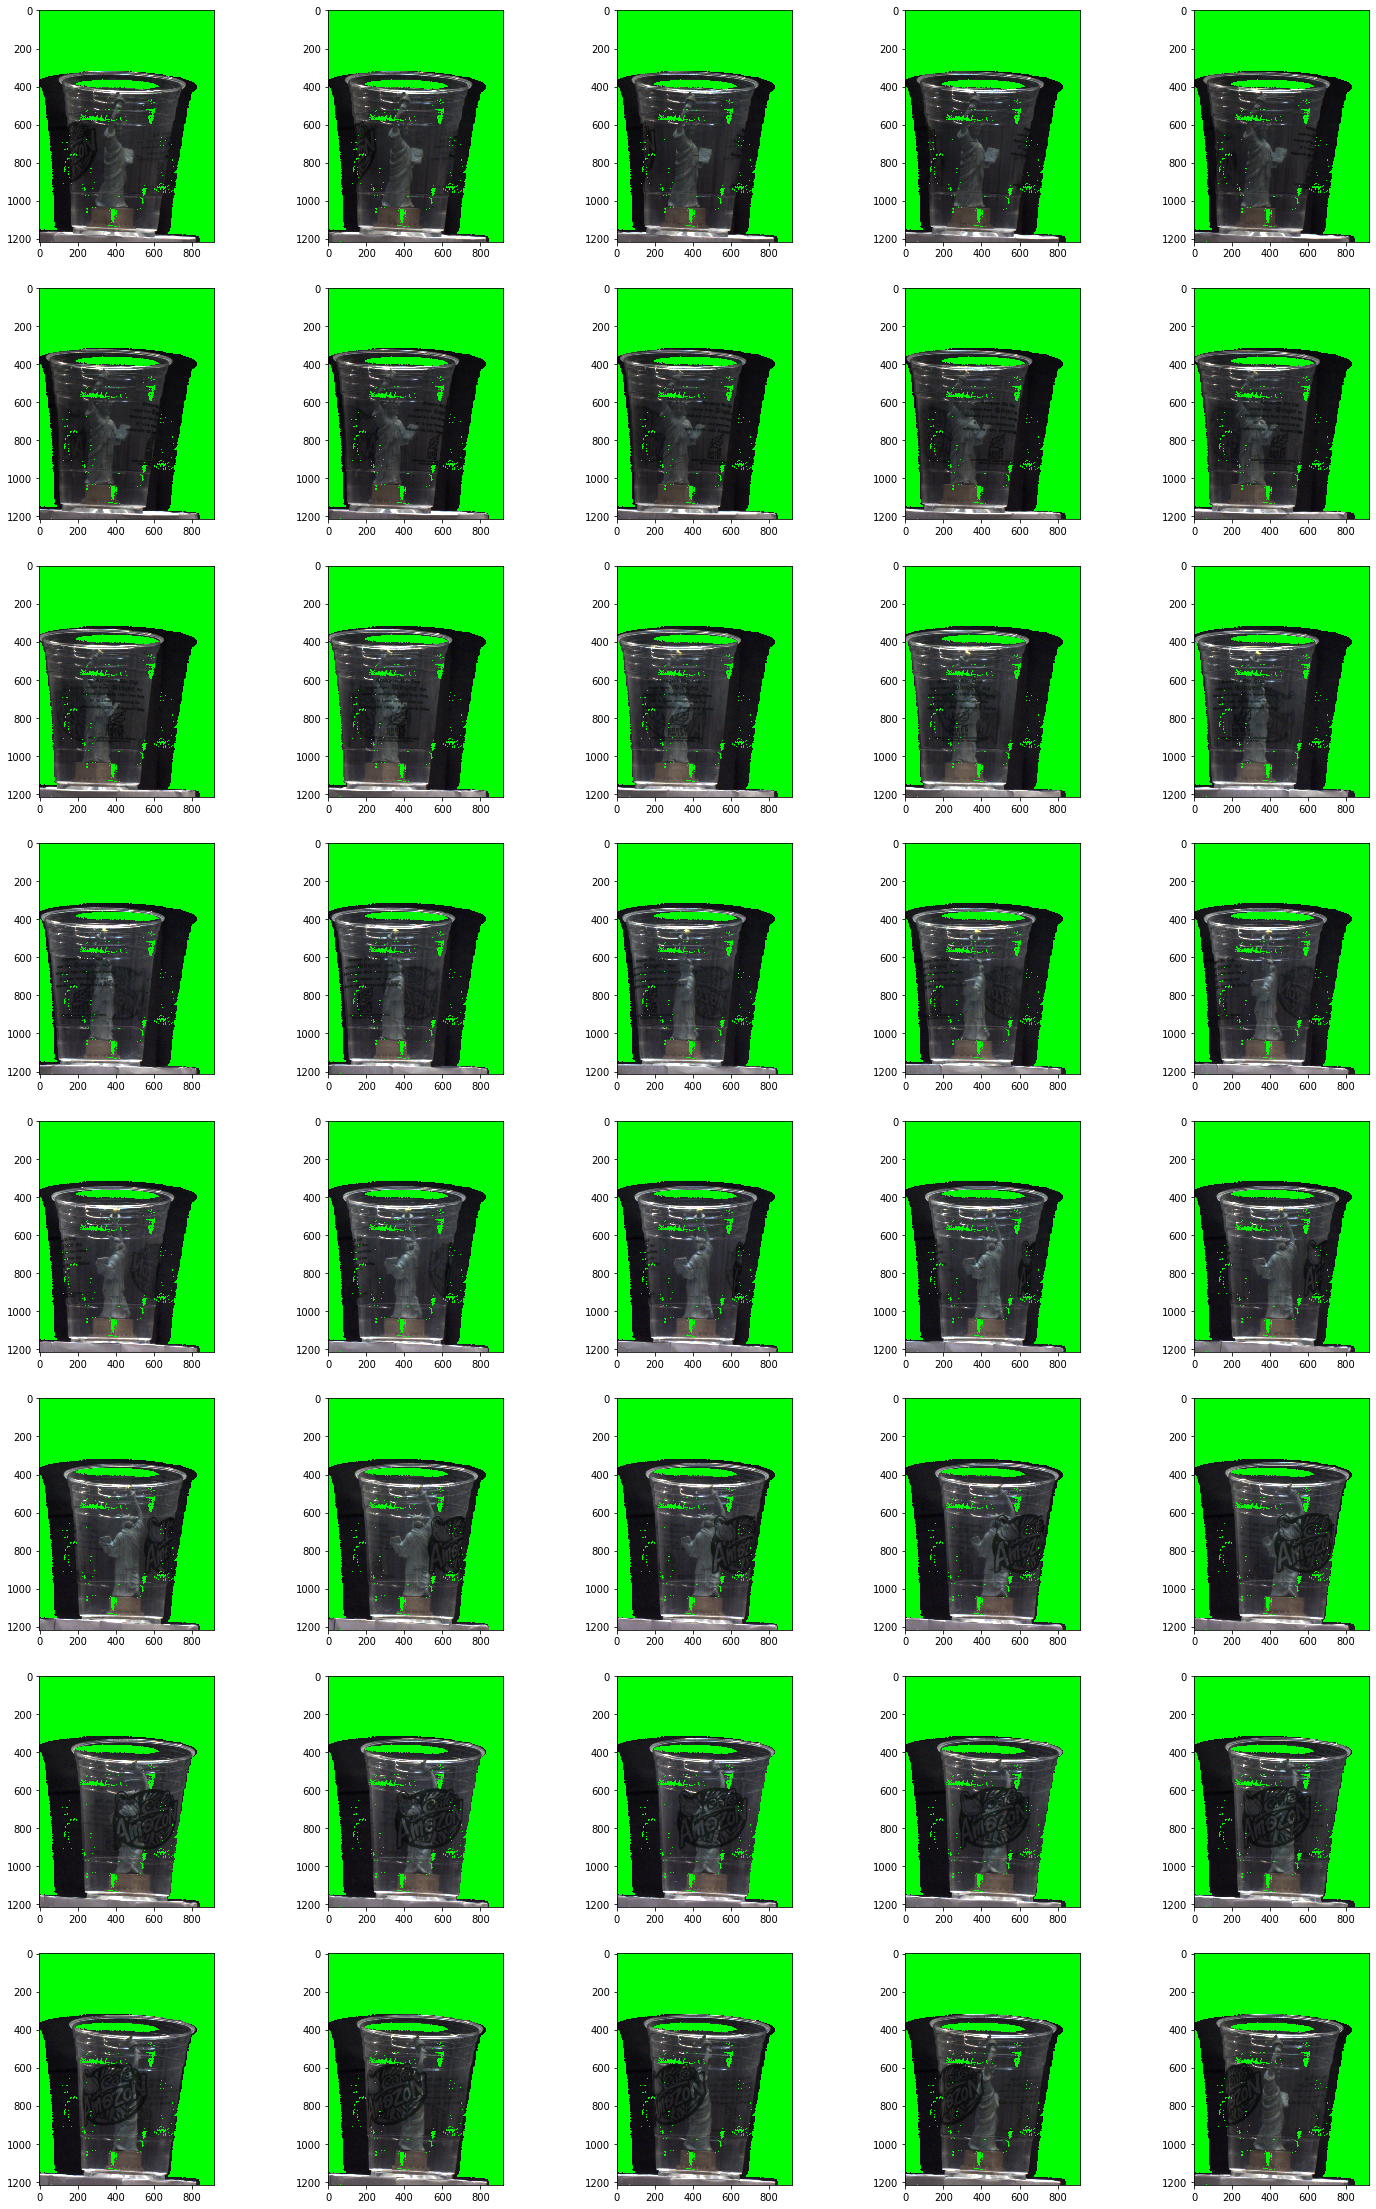

In [38]:
fig, axs = plt.subplots(8, 5,figsize=(25,40))
figsize=(18, 16)
for row in range(8):
    for col in range(5):
        image = plt.imread(INPUT_PATH % (0,row*5+col))
        image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
        image[foreground_prob == 0] = [0,1,0]
        axs[row,col].imshow(image)
plt.show()